In [1]:
from lineagegrn.plot.analysis_result import *
from lineagegrn.downstream_analysis import *
from lineagegrn.utils.constant import *
from lineagegrn.utils.synthetic_data_generation import *
from lineagegrn.cell_fate_map import *
from lineagegrn.gene_regulatory_network import*
from lineagegrn.utils.metrics import *

### Inferring dynamic gene regulatory networks

In [54]:
atac_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/EMS/atac_data.csv"
expression_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/EMS/expression_data.csv"
fate_map_path='examples/data/C.elegans/C.elegans_Core/input_data/EMS/edge_dict_EMS.csv'

saved_dir = 'examples/results/C.elegans/C.elegans_Core/EMS'

edge_dict=load_fate_map_topology(fate_map_path)
edge=parse_edge_dict(edge_dict)
fate_map=FateMap(edge)

regulator_names=list(pd.read_csv('examples/data/C.elegans/C.elegans_Core/additional_input_data/regulatory_genes_name.csv',index_col=0).iloc[:,0])
target_gene_names=list(pd.read_csv('examples/data/C.elegans/C.elegans_Core/additional_input_data/target_genes_name.csv',index_col=0).iloc[:,0])

grn_inference_result = GRNInference(atac_file_path, expression_file_path,fate_map, saved_dir)
grn_inference_result.infer_grn(20)
#target_networks_dict=grn_inference_result.get_target_networks(0)

dynamic_networks_dict=get_dynamic_networks(saved_dir,fate_map,0.1,regulator_names,target_gene_names)

-2025-06-28 22:24:36,164-INFO-29116 Serialize node_id MSp- expression data of regulator_gene
-2025-06-28 22:24:36,856-INFO-29116 Serialize node_id MSp- expression data of target_gene
-2025-06-28 22:24:37,656-INFO-29116 Serialize node_id MSa- expression data of regulator_gene
-2025-06-28 22:24:38,124-INFO-29116 Serialize node_id MSa- expression data of target_gene
-2025-06-28 22:24:38,728-INFO-29116 Serialize node_id Ep- expression data of regulator_gene
-2025-06-28 22:24:38,779-INFO-29116 Serialize node_id Ep- expression data of target_gene
-2025-06-28 22:24:38,841-INFO-29116 Serialize node_id Ea- expression data of regulator_gene
-2025-06-28 22:24:38,890-INFO-29116 Serialize node_id Ea- expression data of target_gene
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\

### Revealing the reconfiguration pattern of inferred GRNs along cell lineages

In [4]:
regulator_dict=get_regulators_for_target_gene('nhr-25', 'Ea-', saved_dir, regulator_names)
print(regulator_dict)

{'ceh-16': 0.19406289308101562, 'ceh-32': 0.22162245944524483, 'nhr-23': 0.4464785158634186, 'nhr-2': 0.24368241163710413, 'ceh-27': 0.2254354933238567, 'mab-5': 0.4464785158634186, 'nob-1': 0.11341780222143619, 'ceh-36': 0.18556505162475365, 'lin-1': 0.2791125408763654, 'eor-1': 0.10483031374674358, 'elt-2': 0.1677233156139836, 'irx-1': 0.17940980334644752, 'pal-1': 0.4464785158634186, 'nhr-79': 0.28570741221039797, 'nhr-67': 0.4464785158634186, 'pha-4': 0.08397229503517525, 'nhr-25': 0.49622952313027735, 'dpl-1': 0.20864964933724123, 'hlh-16': 0.2283244187549371, 'elt-1': 0.2066696301315121, 'die-1': -0.4340407351829689, 'mnm-2': -0.38805249333381653, 'ref-2': -0.38805249333381653, 'lsy-27': -0.47148156170181754, 'B0310.2': -0.29716050267040944, 'dmd-4': -0.2590268191476794, 'end-1': -0.4442064381483651, 'end-3': -0.38805249333381653, 'tbx-37': -0.38805249333381653, 'hlh-1': 0.2437843309567355, 'ref-1': -0.4460623060053642, 'egl-5': -0.38805249333381653, 'elt-7': 0.0884888137977784, 

In [5]:
target_dict=get_targets_for_regulator_gene('elt-7', 'Ea-', saved_dir, regulator_names)
print(target_dict)

{'ama-1': -0.05941768845938058, 'B0310.2': -0.06848864910567136, 'B0336.3': 0.09981652407749816, 'ceh-16': -0.0005209307729908857, 'ceh-27': -0.0006369977235671546, 'ceh-43': -0.02856153085951778, 'die-1': -0.15072803278837446, 'dpl-1': 0.00023143699332468554, 'dpy-31': 0.0022172149079029446, 'dpy-7': 0.04137957975907964, 'dve-1': -0.09575146056522939, 'eef-1A.1': -0.4329556577651586, 'elt-1': 0.0764995410212786, 'elt-6': -0.08176721649740523, 'elt-7': 0.7126796774797668, 'F16B12.6': 0.06617439089430788, 'his-72': 0.09751183693501023, 'hlh-1': -0.21208564363934326, 'hmg-1.2': 0.2550643162567843, 'hmg-11': 0.06472851182935443, 'hsp-3': -0.0035566708304622017, 'irx-1': -0.0009556128902139919, 'isw-1': -0.04986367895529369, 'lin-1': 0.0005933738432879767, 'lin-11': -0.20458049583119461, 'lin-13': -0.09084112247812562, 'lin-26': -0.6151615613037603, 'lin-39': -0.06083332635557828, 'lir-2': 0.052813479438873406, 'mab-5': 0.0005876867293371801, 'mep-1': -0.0019348781069101506, 'mml-1': -0.04

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id: float(target_id_node_id_grn.loc[:, regulator_id])})


In [7]:
output_path='examples/results/C.elegans/C.elegans_Core/figures/'
path=list(fate_map.nodes.keys())

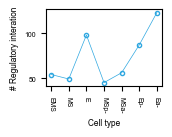

In [8]:
plot_regulatory_interactions_along_fatemap(dynamic_networks_dict,path,output_path)

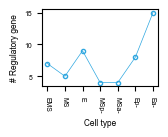

In [9]:
plot_dynamic_regulator_number(saved_dir, regulator_names,'elt-7', path, 0.05,output_path)

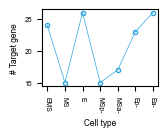

In [10]:
plot_regulatory_genes_along_fatemap(saved_dir, regulator_names, 'elt-7', path, 0.05,output_path)

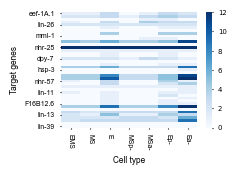

In [11]:
plot_target_genes_along_fatemap(target_gene_names, regulator_names,'negative',saved_dir, path,0.1, output_path)

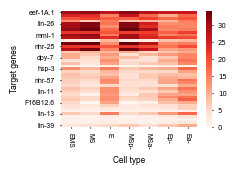

In [12]:
plot_target_genes_along_fatemap(target_gene_names, regulator_names,'positive',saved_dir, path,0.1, output_path)

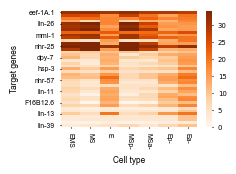

In [13]:
plot_target_genes_along_fatemap(target_gene_names, regulator_names,'total',saved_dir, path,0.1, output_path)

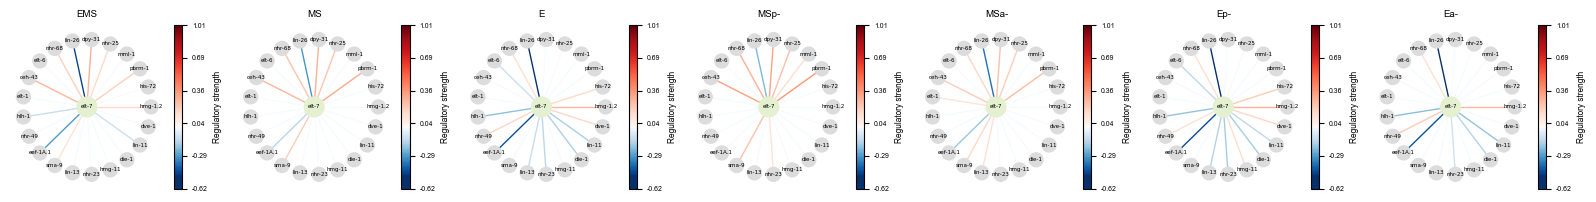

In [14]:
plot_regulatory_network_along_fatemap('elt-7',dynamic_networks_dict,path,output_path,0.1,figsize=(16,2))

In [55]:
map_df = pd.read_csv('examples/data/C.elegans/C.elegans_Core/additional_input_data/fate_map_topology.csv')
edges_dict_Celegans = {}
    
for top_key, group in map_df .groupby("Lineage"):
    sub_dict = {f"{row['Parent']}->{row['Child']}": row['Length'] for _, row in group.iterrows()}
    edges_dict_Celegans[top_key] = sub_dict

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id: float(target_id_node_id_grn.loc[:, regulator_id])})
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id: float(target_id_node_id_grn.loc[:, regulator_id])})
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id:

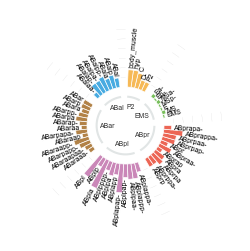

In [16]:
input_path=os.path.dirname(saved_dir)
plot_regulator_activity_across_lineages(edges_dict_Celegans,input_path,'nhr-25',regulator_names,0.35,output_path)

### Identifying regulatory genes key for differentiation

In [56]:
high_expression_genes=load_high_expression_genes('examples/data/C.elegans/C.elegans_Core/input_data/high_expression_genes.csv')

In [65]:
key_regulators_df_concat=pd.DataFrame()
for lineage in edges_dict_Celegans.keys():
    edges = parse_edge_dict(edges_dict_Celegans[lineage])
    fatemap = FateMap(edges,high_expression_genes[lineage])
    nodes=fatemap.node_internals[::-1]+[fatemap.node_root]
    for node in nodes:
        input_path=os.path.join(os.path.dirname(saved_dir),lineage)
        key_regulators=identify_key_genes_differentiation(input_path,fatemap,0.1,regulator_names,target_gene_names,node)
        
        high_expression_genes_of_ancestor_node=list(set(key_regulators.loc[((key_regulators['DRS']>0.25) & (key_regulators['DRC']>0.6)),'regulator_id']) & set(target_gene_names))
        high_expression_genes[lineage][node]=high_expression_genes_of_ancestor_node
        fatemap = FateMap(edges,high_expression_genes[lineage])
        key_regulators_df_concat=pd.concat([key_regulators_df_concat,key_regulators])

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\plot\analysis_result.py:608: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, color='black', fontsize=5, fontname='Arial', va='center')
-2025-06-28 22:28:50,708-WARNING-29116 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


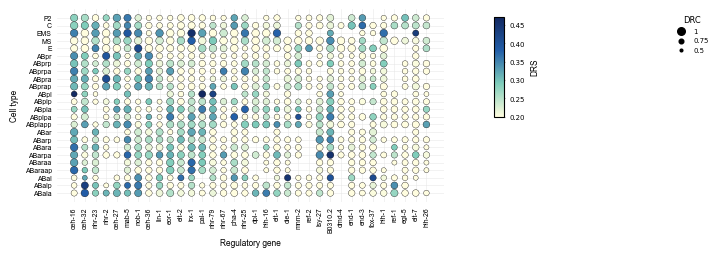

<Axes: xlabel='Regulatory gene', ylabel='Cell type'>

In [ ]:
nodes=list(key_regulators_df_concat['node_id'].drop_duplicates())
plot_key_genes_differentiation(key_regulators_df_concat,nodes,regulator_names,output_path,figsize=(5,2.5))

### Identifying constitutive and specific regulatory interactions

In [21]:
X,centers,weight_matrix=cluster_regulatory_interactions(saved_dir,fate_map, 0.3, regulator_names, target_gene_names, len(regulator_names),len(target_gene_names), 5, 2)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

In [22]:
edges_cluster_to_nodes=identify_regulatory_interactions_specificity(saved_dir, fate_map, 0.1, regulator_names, target_gene_names, 5, 0.3, X, len(regulator_names), len(target_gene_names), weight_matrix)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

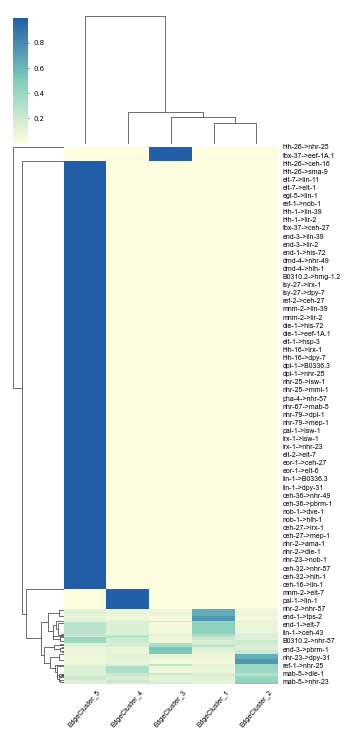

In [23]:
plot_regulatory_interactions_clustering(weight_matrix, output_path)

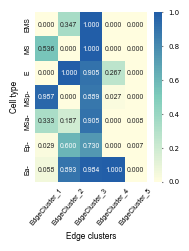

In [24]:
plot_regulatory_interactions_in_celltypes(edges_cluster_to_nodes, output_path)